# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
spy_amount = 50
agg_amount = 200

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
my_crypto_value_start = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40575.60
The current value of your 5.3 ETH is $11369.08


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-07-16", tz="America/Chicago").isoformat()
three_years_ago = pd.Timestamp("2018-07-16", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

df_portfolio_now = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio_now.head()

AGG                                  SPY  \
                             open    high     low  close   volume open   
time                                                                     
2021-07-16 00:00:00-04:00  115.77  115.96  115.76  115.9  3679747  436   

                                                             
                             high     low   close    volume  
time                                                         
2021-07-16 00:00:00-04:00  436.06  430.92  431.38  66637403

In [9]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Pick AGG and SPY close prices
df_closing_prices["AGG"] = df_portfolio_now['AGG']['close']
df_closing_prices["SPY"] = df_portfolio_now['SPY']['close']

agg_close_price = df_closing_prices["AGG"][0]
spy_close_price = df_closing_prices["SPY"][0]

# # Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.9
Current SPY closing price: $431.38


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21569.00
The current value of your 200 AGG shares is $23180.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# set printing format to only 2 decimals for dataframe floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [crypto, shares]}, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,51944.68
shares,44749.00


array([<AxesSubplot:ylabel='amount'>], dtype=object)

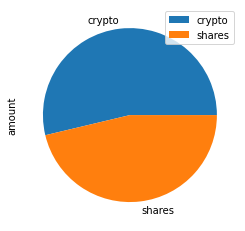

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# calculate the how much is needed to reach goal
difference = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations you have saved enough money to be completely safe from emergencies!')
elif total_savings == emergency_fund:
    print('Congratulations you have saved enough money reach your goal for the emergency fund!')
elif total_savings < emergency_fund:
    print(f'You are ${difference} away from meeting your emergency fund goal!')


Congratulations you have saved enough money to be completely safe from emergencies!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                  SPY         \
                            open   high    low  close   volume   open   high   
time                                                                           
2017-05-11 00:00:00-04:00 108.35 108.54 108.34 108.52  1773499 239.35 239.57   
2017-05-12 00:00:00-04:00 108.81 108.94 108.78 108.92  1136553 239.09 239.21   
2017-05-15 00:00:00-04:00 108.85 108.94 108.82 108.89  1620264 239.47 240.44   
2017-05-16 00:00:00-04:00 108.88 109.10 108.88 109.00  1394153 240.62 240.67   
2017-05-17 00:00:00-04:00 109.35 109.60 109.28 109.56  2263851 238.10 238.64   

                                                    
                             low  close     volume  
time                                                
2017-05-11 00:00:00-04:00 238.13 239.41   45435690  
2017-05-12 00:00:00-04:00 238.67 239.03   35283567  
2017-05-15 00:00:00-04:00 239.45 240.25   42230620  
2017-05-16 00:00:00-04:00 239.63 240.10   37206183  
2017-05-17 00:00:00-04:00 235.75 235.85  118613594

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [25]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                             \
                            open   high    low  close   volume daily_return   
time                                                                          
2017-05-11 00:00:00-04:00 108.35 108.54 108.34 108.52  1773499          NaN   
2017-05-12 00:00:00-04:00 108.81 108.94 108.78 108.92  1136553         0.00   
2017-05-15 00:00:00-04:00 108.85 108.94 108.82 108.89  1620264        -0.00   
2017-05-16 00:00:00-04:00 108.88 109.10 108.88 109.00  1394153         0.00   
2017-05-17 00:00:00-04:00 109.35 109.60 109.28 109.56  2263851         0.01   

                             SPY                                               
                            open   high    low  close     volume daily_return  
time                                                                           
2017-05-11 00:00:00-04:00 239.35 239.57 238.13 239.41   45435690          NaN  
2017-05-12 00:00:00-04:00 239.09 239.21 238.67 239.03   35283567        -0.00  
2017-05-15 00:00:00-04:00 239.47 240.44 239.45 240.25   42230620         0.01  
2017-05-16 00:00:00-04:00 240.62 240.67 239.63 240.10   37206183        -0.00  
2017-05-17 00:00:00-04:00 238.10 238.64 235.75 235.85  118613594        -0.02

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,0.99,1.00,1.02,1.00,1.02,1.01,1.00,1.01,1.00,...,0.99,1.00,1.01,1.00,1.01,1.01,1.00,1.00,1.01,1.00
2,0.99,0.99,1.01,1.02,1.00,1.02,1.01,1.01,1.01,1.00,...,1.00,1.00,1.02,1.01,1.01,1.02,1.00,0.99,1.01,1.00
3,0.99,0.99,1.02,1.01,1.00,1.01,1.01,1.01,1.01,1.01,...,0.98,0.99,1.01,1.02,1.01,1.02,1.00,1.00,1.01,0.99
4,0.99,1.00,1.02,1.00,1.00,1.02,1.02,1.02,1.01,1.02,...,0.98,0.99,1.01,1.01,1.01,1.01,0.99,0.99,1.02,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.74,18.54,17.00,9.03,29.71,15.13,20.53,9.96,5.60,8.69,...,72.75,16.72,17.05,14.16,10.13,14.20,20.33,39.78,15.76,15.06
7557,17.95,18.56,17.21,9.04,29.87,15.23,20.71,9.84,5.59,8.70,...,73.24,16.62,17.18,14.08,10.23,14.33,20.34,39.71,15.83,15.05
7558,18.21,18.59,17.18,9.08,29.52,15.38,20.74,9.94,5.54,8.70,...,73.52,16.45,17.09,14.17,10.20,14.26,20.23,39.57,15.75,14.93
7559,18.45,18.34,17.19,9.12,29.45,15.25,20.64,9.94,5.53,8.72,...,73.97,16.45,17.14,14.25,10.11,14.32,20.27,39.58,15.86,14.90


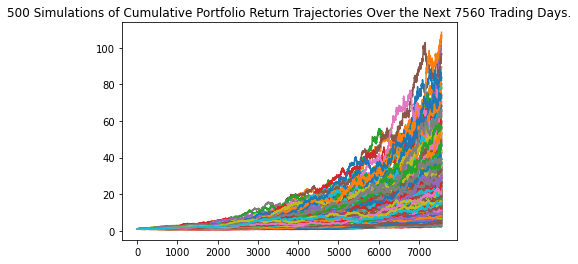

In [27]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

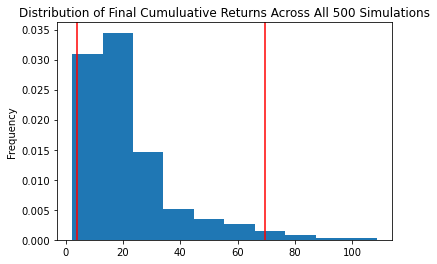

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count          500.00
mean            21.56
std             16.65
min              2.28
25%             10.83
50%             16.82
75%             26.28
max            108.45
95% CI Lower     4.02
95% CI Upper    69.56
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80309.02 and $1391148.73


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $120463.53 and $2086723.1


## Optional Challenge - Early Retirement


### Five Years Retirement Option

### Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print out some results
MC_fiveyear.portfolio_data.head()

In [50]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.01,1.01,1.00,1.00,1.00,1.01,0.98,0.99,1.01,1.00,...,1.00,1.00,1.00,1.00,0.99,1.01,1.01,1.01,1.00,0.99
2,1.01,1.02,1.01,1.00,0.99,1.00,0.98,0.99,1.01,1.00,...,1.00,1.00,0.99,1.01,1.00,1.02,1.02,1.01,0.99,0.99
3,1.01,1.02,1.00,0.99,1.00,1.01,0.98,0.98,1.01,1.00,...,1.00,1.00,0.98,1.02,0.99,1.01,1.01,0.99,1.00,0.99
4,1.01,1.01,0.99,1.00,0.99,1.02,0.98,0.97,1.02,1.00,...,0.99,1.00,0.98,1.02,1.00,1.00,1.03,0.99,0.99,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.81,1.23,2.24,1.98,1.95,1.31,1.72,1.59,1.42,1.96,...,2.45,2.08,1.79,1.78,1.94,1.21,2.62,1.19,1.59,1.42
1257,1.80,1.24,2.26,1.99,1.89,1.32,1.73,1.58,1.42,1.93,...,2.42,2.10,1.79,1.76,1.96,1.21,2.59,1.18,1.58,1.41
1258,1.79,1.23,2.23,1.98,1.89,1.32,1.74,1.58,1.42,1.94,...,2.47,2.12,1.80,1.77,1.97,1.21,2.60,1.19,1.60,1.42
1259,1.81,1.25,2.24,2.00,1.87,1.31,1.75,1.59,1.43,1.95,...,2.47,2.14,1.79,1.80,1.98,1.22,2.59,1.19,1.61,1.42


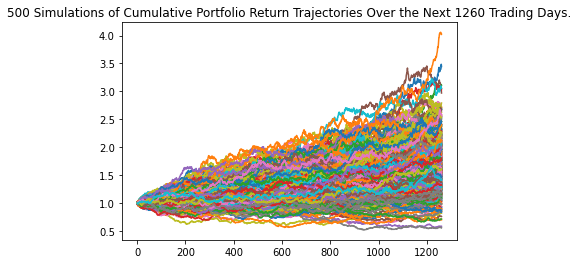

In [51]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

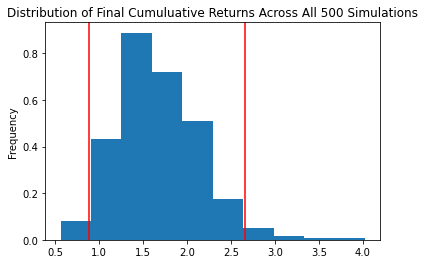

In [52]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count          500.00
mean             1.66
std              0.46
min              0.56
25%              1.32
50%              1.61
75%              1.96
max              4.02
95% CI Lower     0.89
95% CI Upper     2.66
Name: 1260, dtype: float64


In [54]:
# Set initial investment (larger than default)
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 5 years will end within in the range of $26640.74 and $79947.1


### Ten Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print out some results
MC_tenyear.portfolio_data.head()

AGG                                             \
                            open   high    low  close   volume daily_return   
time                                                                          
2017-05-11 00:00:00-04:00 108.35 108.54 108.34 108.52  1773499          NaN   
2017-05-12 00:00:00-04:00 108.81 108.94 108.78 108.92  1136553         0.00   
2017-05-15 00:00:00-04:00 108.85 108.94 108.82 108.89  1620264        -0.00   
2017-05-16 00:00:00-04:00 108.88 109.10 108.88 109.00  1394153         0.00   
2017-05-17 00:00:00-04:00 109.35 109.60 109.28 109.56  2263851         0.01   

                             SPY                                               
                            open   high    low  close     volume daily_return  
time                                                                           
2017-05-11 00:00:00-04:00 239.35 239.57 238.13 239.41   45435690          NaN  
2017-05-12 00:00:00-04:00 239.09 239.21 238.67 239.03   35283567        -0.00  
2017-05-15 00:00:00-04:00 239.47 240.44 239.45 240.25   42230620         0.01  
2017-05-16 00:00:00-04:00 240.62 240.67 239.63 240.10   37206183        -0.00  
2017-05-17 00:00:00-04:00 238.10 238.64 235.75 235.85  118613594        -0.02

In [56]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,0.99,1.00,1.00,1.01,0.99,0.99,1.01,1.00,1.00,1.00,...,1.00,1.01,1.00,0.99,1.00,0.99,1.00,1.00,1.00,1.00
2,0.99,0.99,1.00,1.00,0.99,0.99,1.01,0.99,0.99,1.00,...,1.00,1.02,1.00,0.99,1.01,0.99,1.02,1.00,1.00,1.00
3,0.99,0.98,1.01,0.99,0.98,0.98,1.00,0.99,0.99,0.99,...,1.01,1.02,0.99,0.98,1.00,0.99,1.02,1.00,0.99,1.02
4,1.00,0.98,1.00,1.00,0.97,0.98,1.01,0.99,0.99,0.99,...,1.02,1.04,0.98,0.98,1.00,0.98,1.03,1.00,1.00,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.03,3.02,1.90,5.28,2.17,3.12,1.40,3.03,2.69,2.21,...,3.73,3.73,1.85,2.04,1.90,1.76,4.08,2.70,1.85,2.90
2517,5.09,3.00,1.91,5.29,2.17,3.12,1.40,3.03,2.71,2.21,...,3.73,3.69,1.89,2.05,1.89,1.78,4.03,2.67,1.84,2.87
2518,5.10,3.04,1.91,5.24,2.17,3.17,1.40,3.00,2.71,2.23,...,3.74,3.68,1.90,2.07,1.92,1.77,4.06,2.68,1.84,2.89
2519,5.14,3.06,1.91,5.26,2.16,3.17,1.40,3.00,2.76,2.21,...,3.71,3.68,1.88,2.07,1.90,1.78,4.04,2.66,1.85,2.91


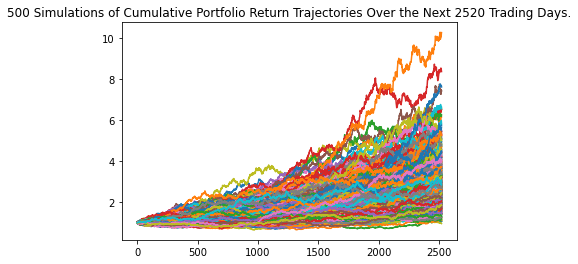

In [57]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

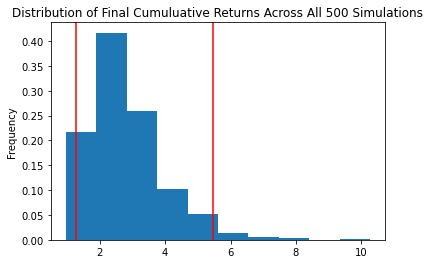

In [59]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count          500.00
mean             2.82
std              1.16
min              0.96
25%              2.01
50%              2.62
75%              3.32
max             10.27
95% CI Lower     1.28
95% CI Upper     5.48
Name: 2520, dtype: float64


In [61]:
# Set initial investment (larger than default)
initial_investment =  30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $38536.06 and $164269.1
